<a href="https://colab.research.google.com/github/Frankl1sales/yolo-basic-course/blob/main/YOLO_v4_Detec%C3%A7%C3%A3o_de_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [1]:
!pip uninstall -y opencv-python opencv-contrib-python


Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [2]:
!pip install opencv-python==4.9.0.80


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 6.6 MB/s eta 0:00:00


In [3]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.9.0


## Etapa 2 - Conectando com o Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [5]:
path = '/content/gdrive/MyDrive/home/2. PESQUISAS/4. Org. Cursos/Udemy/YOLO/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [6]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [7]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
len(LABELS)

80

In [9]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [10]:
net = cv2.dnn.readNet(config_path, weights_path)

In [11]:
net

< cv2.dnn.Net 0x7f8839531f30>

## Etapa 4 - Definindo mais configurações para a detecção

In [51]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[ 22 100 194]
 [ 91 215  29]
 [  1  27 222]
 [ 87  29 193]
 [100  39 221]
 [246 225 134]
 [225 209 103]
 [ 28 252  91]
 [ 30  65  26]
 [112 232  49]
 [ 65  35 236]
 [ 17 123 239]
 [ 31  22 150]
 [241 151  86]
 [  7 147 232]
 [215  82  22]
 [ 98  39  17]
 [139 131 193]
 [118  17 236]
 [ 51  81 111]
 [125 160 132]
 [160  71 162]
 [ 41 230 190]
 [206   6  72]
 [  4 152 141]
 [204  67 211]
 [  0  36 154]
 [193 154 192]
 [129 110  50]
 [ 69 177 150]
 [228 116 225]
 [ 13 118  35]
 [ 64  18 228]
 [197 110 106]
 [ 30 230  26]
 [254  41 102]
 [253 165 221]
 [123 160 225]
 [ 49 218 211]
 [  3 206 165]
 [133  62 189]
 [ 69 170 136]
 [ 10  49 165]
 [112 131 204]
 [103 152  84]
 [  3 105 175]
 [ 10 222 190]
 [236 147 112]
 [242 116  92]
 [126 175  45]
 [243 193  62]
 [162 229   0]
 [222  95 178]
 [ 60 177  20]
 [125  65  64]
 [185 200 248]
 [205 223 203]
 [ 40  75  56]
 [111  64 223]
 [112 191 214]
 [151  60 222]
 [  5  61 129]
 [102 128 131]
 [ 19 114 235]
 [ 73  23  38]
 [140 196  48]
 [ 44   0 

In [13]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [14]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[327 353 379]


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque `ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]` por:
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

No segundo semestre de 2023, o Colab passou a atribuir automaticamente o Python 3.10 às sessões, portanto deixaremos assim

In [15]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [16]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

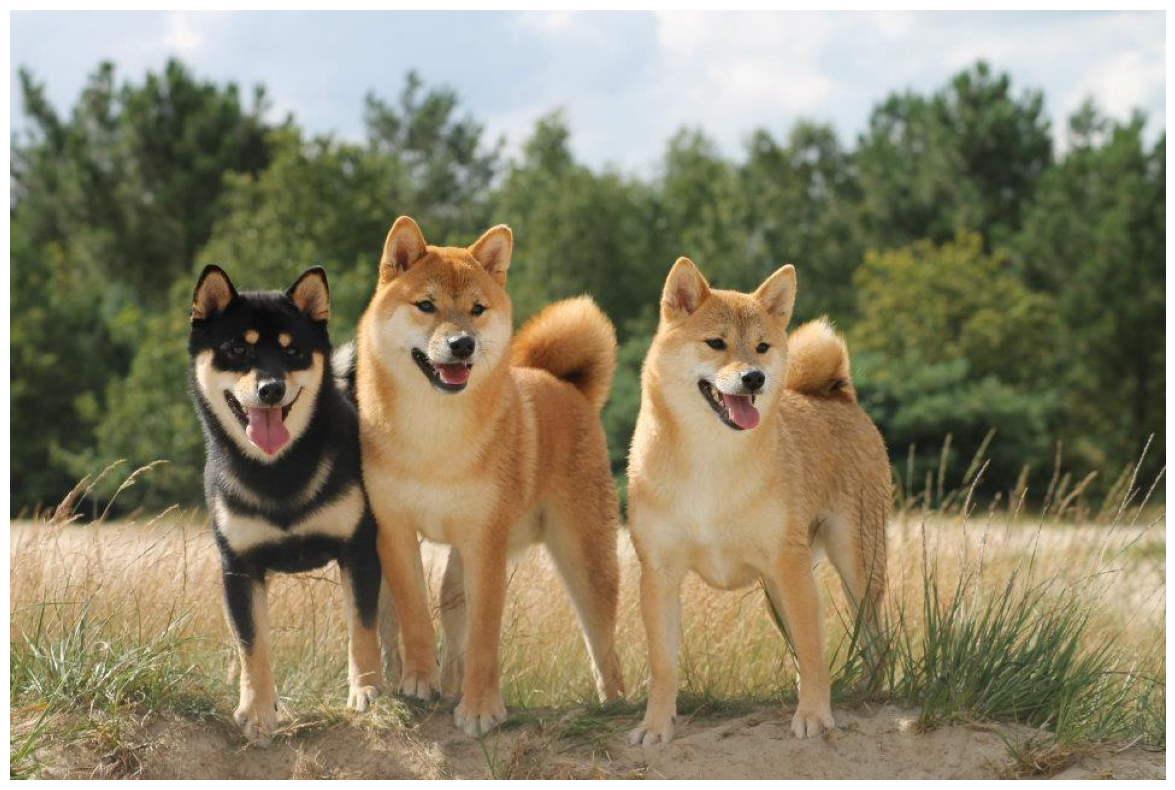

In [17]:
imagem = cv2.imread('/content/gdrive/MyDrive/home/2. PESQUISAS/4. Org. Cursos/Udemy/YOLO/imagens/cachorros.jpg')
mostrar(imagem)

In [18]:
type(imagem)

numpy.ndarray

In [19]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [20]:
imagem_cp = imagem.copy()

In [21]:
imagem.shape

(640, 960, 3)

In [22]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [23]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 4.00 segundos


## Etapa 7 - Definindo as variáveis

In [24]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [25]:
len(layer_outputs)

3

In [26]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.01100558, 0.01021743, 0.02264772, ..., 0.        , 0.        ,
         0.        ],
        [0.01492394, 0.01543288, 0.03303435, ..., 0.        , 0.        ,
         0.        ],
        [0.01701084, 0.01489796, 0.05110351, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.9842644 , 0.03099856, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.9859079 , 0.0597507 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 8112)

In [27]:
layer_outputs[1]

array([[0.03031929, 0.0320848 , 0.10433294, ..., 0.        , 0.        ,
        0.        ],
       [0.0329858 , 0.03253518, 0.13059318, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151371, 0.15157267, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866277, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513659, ..., 0.        , 0.        ,
        0.        ],
       [0.9661032 , 0.9677124 , 0.10772248, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [28]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.06402372, 0.06951444, 0.15857781, ..., 0.        , 0.        ,
         0.        ],
        [0.0616472 , 0.05672149, 0.31426504, ..., 0.        , 0.        ,
         0.        ],
        [0.03240769, 0.0500917 , 0.7458859 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.2066342 , ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772216, ..., 0.        , 0.        ,
         0.        ],
        [0.9512335 , 0.95295554, 0.5208086 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023718e-02, 6.9514439e-02, 1.5857781e-01, 3.4840187e-01,
        4.2169395e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [29]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [30]:
LABELS[16]

'dog'

In [31]:
np.argmax(np.array([0.10, 0.80, 0.10]))

1

In [32]:
teste = np.array([0.10, 0.80, 0.10])

In [33]:
teste[1]

0.8

In [36]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.6059549 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provável: 16
confiança: 0.6059549
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570457 0.        0.        0.        0.
 0.       

In [37]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406], [145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 45)

In [41]:
print(confiancas), len(confiancas)

[0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283, 0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283]


(None, 45)

In [42]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 45)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [43]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [44]:
objs

array([ 7, 15, 11], dtype=int32)

In [45]:
print(objs.flatten())

[ 7 15 11]


In [46]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824249744415283, 0.9767161011695862)

In [47]:
confiancas[0]

0.6059548854827881

## Etapa 10 - Mostrando o resultado da detecção na imagem

In [62]:
# Alterar a cor da posição 16 para rosa
COLORS[16] = [220, 147, 237]

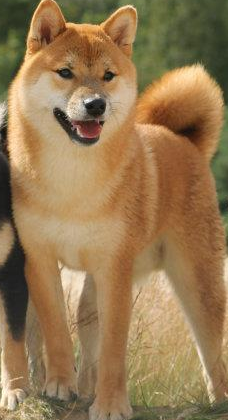

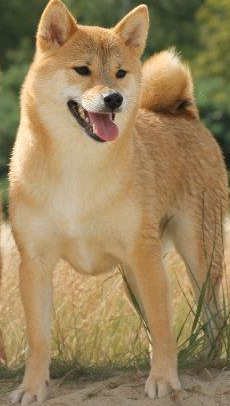

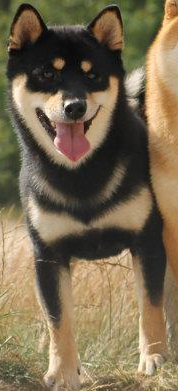

In [64]:
if len(objs) > 0:
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])

    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]]

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

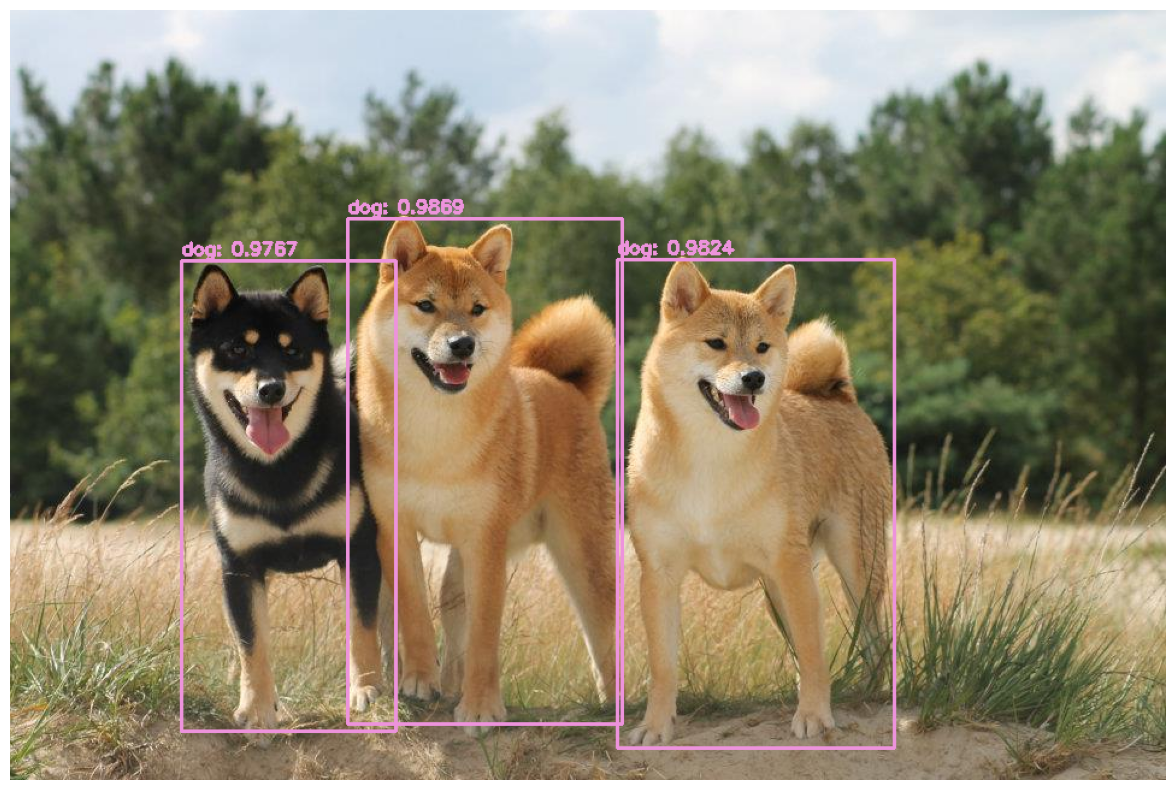

In [65]:
mostrar(imagem)

In [66]:
cv2.imwrite('resultado.jpg', imagem)

True

In [67]:
!cp ./resultado.jpg /content/gdrive/MyDrive/home/2.\ PESQUISAS/4.\ Org.\ Cursos/Udemy/YOLO/imagens/resultado_cachorro.jpg